In [1]:
import pickle
from itertools import product
from pathlib import Path
from random import choices

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import seaborn as sns

from eval import (
    Episode,
    Study,
    number_of_better_final_beams,
    plot_beam_parameters_on_screen,
    plot_best_mae_box,
    plot_best_mae_diff_over_problem,
    plot_best_mae_over_time,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_screen_image,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
    problem_aligned,
    screen_extent,
)

In [2]:
plt.style.use(["science", "nature"])
FIG_DIR = "figures/bo_vs_rl"

In [3]:
rl_magnet_failing = Study.load(
    "data/bo_vs_rl/simulation/rl_magnet_failing/",
    name="RL Failed (at step 40)",
)

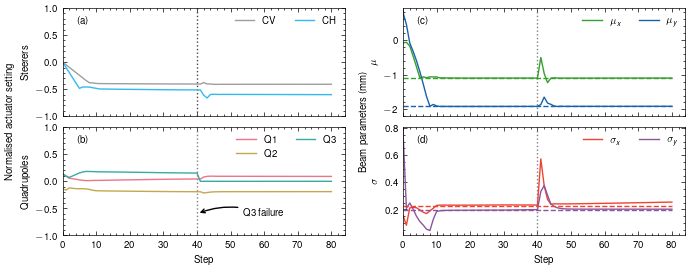

In [9]:
# Pretty plot for paper
episode = rl_magnet_failing.get_episodes_by_problem(33)[0]


fig = plt.figure(tight_layout=True, figsize=(510 / 72.72, 510 / 72.72 * 0.4))
gs = matplotlib.gridspec.GridSpec(2, 4, width_ratios=[0.05, 1, 0.001, 1])
ax_dummy1 = fig.add_subplot(gs[:, 0])
ax_dummy2 = fig.add_subplot(gs[:, 2])
# ax_dummy1.set_visible(False)
for ax in [ax_dummy1, ax_dummy2]:
    ax.set_xticks([])
    ax.set_yticks([])
    [ax.spines[side].set_visible(False) for side in ("left", "top", "right", "bottom")]
    ax.patch.set_visible(False)
ax_dummy1.set_ylabel("Normalised actuator setting")
ax_dummy2.set_ylabel("Beam parameters (mm)")
ax2 = fig.add_subplot(gs[1, 1])
ax1 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[1, 3])
axs = np.array([ax1, ax2, ax3, ax4])

episode.plot_quadrupoles(
    ax=ax2, legend=False, vertical_marker=(40), normalize=True, ylabel=False
)
ax2.legend(ncol=2)
ax2.annotate(
    "Q3 failure",
    (40, -0.6),
    (60, -0.6),
    ha="center",
    va="center",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"),
)
episode.plot_correctors(
    ax=ax1,
    legend=False,
    vertical_marker=(40),
    normalize=True,
    xlabel=False,
    ylabel=False,
)
ax1.legend(ncol=2)
episode.plot_beam_parameters(
    ax=ax3, legend=False, vertical_marker=40, mode="mu", xlabel=False, ylabel=False
)
ax3.legend(ncol=2)
episode.plot_beam_parameters(
    ax=ax4, legend=False, vertical_marker=40, mode="sigma", ylabel=False
)
ax4.legend(ncol=2)

# magnet_handles, magnet_labels = axs[0].get_legend_handles_labels()
# beam_handles, beam_labels = axs[1].get_legend_handles_labels()

# lines_labels = [ax.get_legend_handles_labels() for ax in axs.flatten()]
# handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# legend = fig.legend(
#     handles,
#     labels,
#     ncol=len(handles),
#     frameon=True,
#     edgecolor="inherit",
#     loc="lower center",
#     bbox_to_anchor=(0.5, -0.095),
# )

# fig.supylabel("Normalized actuator setting")

subfig_names = ["(a)", "(b)", "(c)", "(d)"]
for idx, ax in enumerate(axs.flatten()):
    ax.text(x=0.05, y=0.86, s=subfig_names[idx], transform=ax.transAxes)
ax2.set_ylabel("Quadrupoles")
ax1.set_ylabel("Steerers")
ax3.set_ylabel(r"$\mu$")
ax4.set_ylabel(r"$\sigma$")

ax3.xaxis.set_ticklabels([])
ax1.xaxis.set_ticklabels([])
ax3.set_ylim(-2.2, None)
# ax4.set_ylim(0, 1)

fig.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace=0.1)
fig.align_ylabels([ax2, ax4])
fig.align_ylabels([ax1, ax3])
fig.savefig(f"{FIG_DIR}/magnet_failure_rl_example_new.pdf")